# Kütüphane Tanımlamaları

In [ ]:
!pip install pydicom
!pip install pypng

In [ ]:
import numpy as np
import pydicom
import png
import cv2 as cv
import glob
import re
import cv2
import matplotlib.pyplot as plt
%matplotlib inlineimport cv2
import os

# Histogram Eşitleme

(([], []), ([], []))

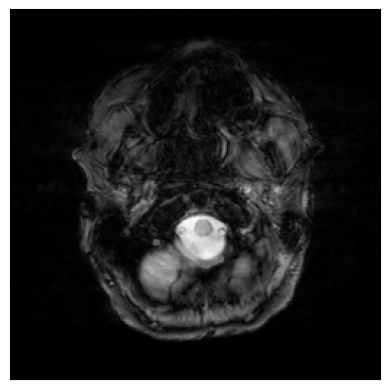

In [ ]:
#Resimlerimizden bir örnek alıp ekrana yazdırıyoruz
img = cv2.imread('first-img.png', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Text(0, 0.5, 'Frekans')

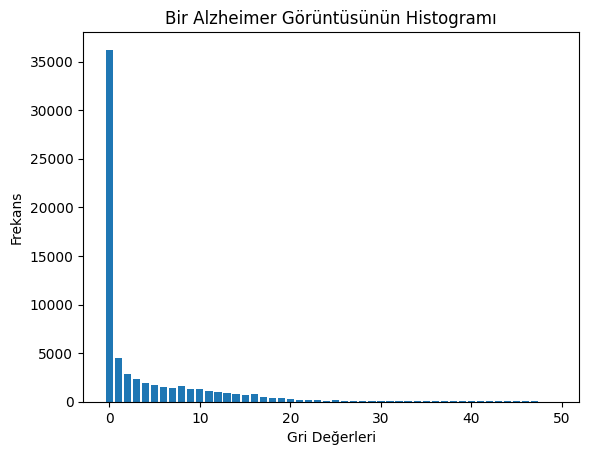

In [ ]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# görüntünün histogram grafiğine bakıyoruz
plt.bar(range(50), hist.ravel())
plt.title('Bir Alzheimer Görüntüsünün Histogramı')
plt.xlabel('Gri Değerleri')
plt.ylabel('Frekans')

In [ ]:
# Görüntüyü manipüle etmek için fonksiyon tanımlıyoruz
def manip_image(image, alpha, beta):

  new_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)

  return new_image

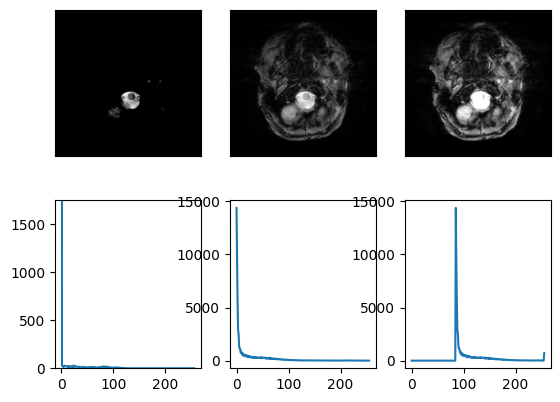

In [ ]:
#Resmin değerlerini alpha ile çarpıp beta değerini ekleyerek yeni sonuçlar oluşturuyoruz
bright = manip_image(img, 1, 85)
dark = manip_image(img, 1, -130)

# Sonuçları karşılaştırıyoruz
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

(0.0, 1750.0)

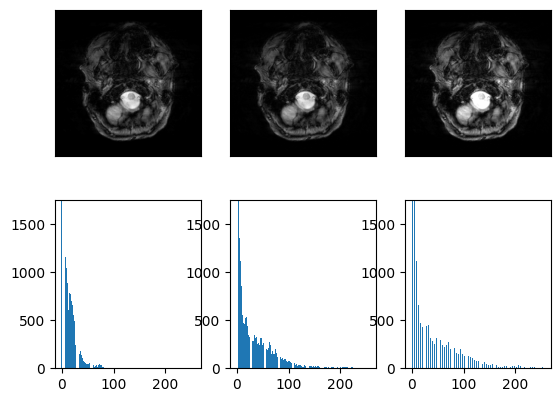

In [ ]:
#Görüntünün kontrastını değiştiriyoruz
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Sonuçları karşılaştırıyoruz
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256),
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

In [ ]:
#Arttırılmış kontrast olan görüntü daha net olduğu için daha sonra kullanmak üzere kaydediyorum
cv2.imwrite('/content/drive/MyDrive/contrast_up.png',increase_contrast)

True

<BarContainer object of 256 artists>

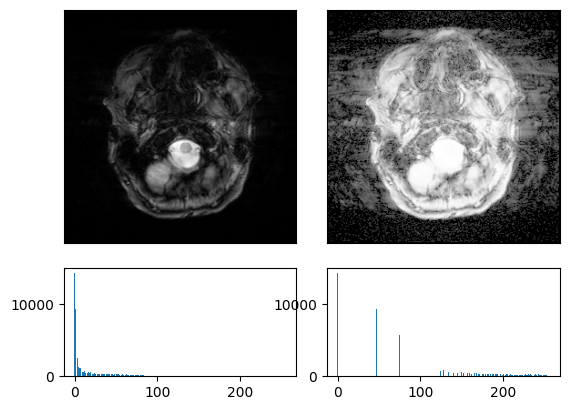

In [ ]:
#Görüntünün renk dağılımını eşitleme ile dağıtıyoruz (seçtiğim görüntüde pek iyi sonuç vermedi gibi gözüküyor)
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.3, hspace=0.2)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())

<BarContainer object of 256 artists>

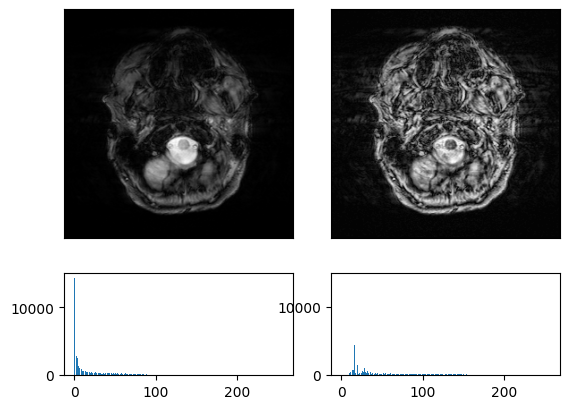

In [ ]:
#Clahe ile kontrast arttırma yapmaya çalışıyoruz. Ayrıntı ve kenarları daha iyi göstermek için bu güze bir yöntem
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32, 32))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())

In [ ]:
# Aldığım çıktıda kıvrım ve detaylar artmış gibi görünüyor, bu resmi de ayrıca kaydediyorum
cv2.imwrite('/content/drive/MyDrive/clahed_img.png',img_cl)

True

# Sobel / Laplacian

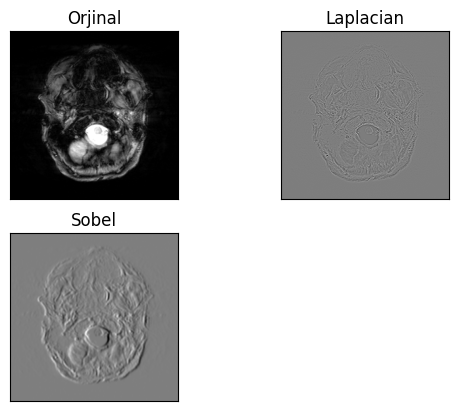

In [ ]:
#Kontrastı arttırılmış resimle laplacian ve sobel deniyorum
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)

#laplacian
laplacian = cv2.Laplacian(frame,cv2.CV_64F)

# 1.0 sobel
sobel = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)

plt.subplot(2,2,1),plt.imshow(frame, cmap = 'gray')
plt.title('Orjinal'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

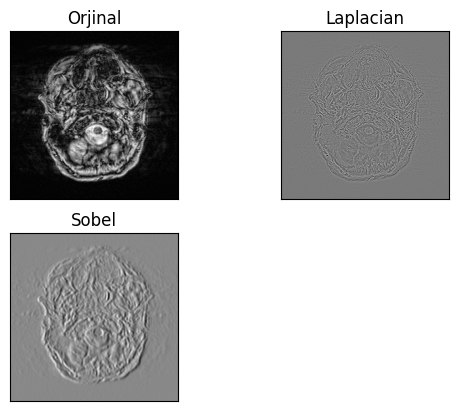

In [ ]:
#Clahe uygulanmış resimle laplacian ve sobel deniyorum
# Öncekinden daha detaylı bir çıktıya ulaşıyorum
frame = cv2.imread('/content/drive/MyDrive/clahed_img.png',0)

#laplacian
laplacian = cv2.Laplacian(frame,cv2.CV_64F)

# 1.0 sobel
sobel = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)

plt.subplot(2,2,1),plt.imshow(frame, cmap = 'gray')
plt.title('Orjinal'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# Sobel çıktısı detaylı görünüyor, kaydediyorum.
cv2.imwrite('/content/drive/MyDrive/sobel_img.png',sobel)

True

# Sobel

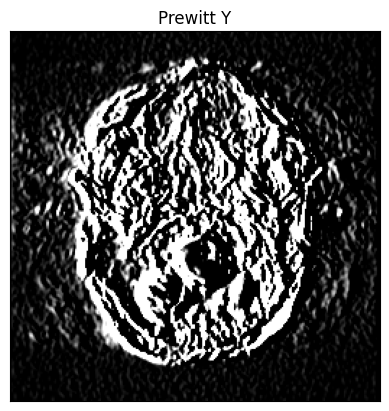

In [ ]:
img = cv2.imread('/content/drive/MyDrive/contrast_up.png')
output = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

plt.imshow(output)
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Sobel x,y & laplacian

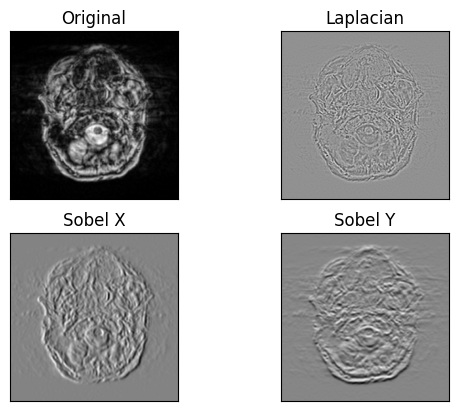

In [ ]:
img0 = cv2.imread("/content/drive/MyDrive/clahed_img.png",)

gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# resimdeki gürültüleri gideriyoruz
img = cv2.GaussianBlur(gray,(3,3),0) #resimdeki karlamaları gidermek için kullanıyoruz

# Burada kenar bulma algoritmalarından laplacian ve sobeli kullanıyoruz, sobel i x ve y olarak yapıyoruz
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

#Kırpma

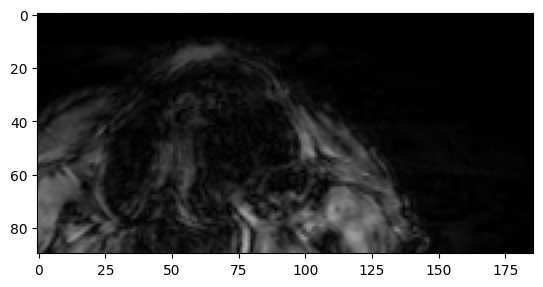

In [ ]:
#Resmimize kırpma işlemi uyguluyoruz
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png')
#Alınan görüntüyü 10,100 - 100,200 şeklinde kırp
kesilmis_frame = frame[10:100, 70:300]
plt.imshow(kesilmis_frame)
plt.show()

# Resize

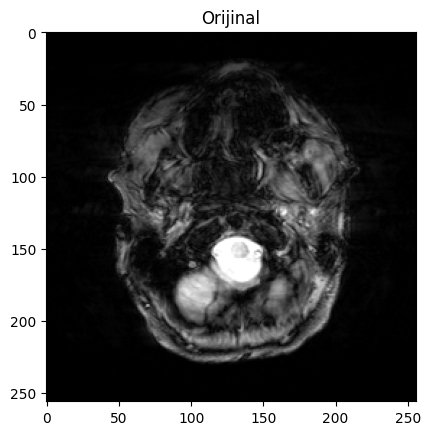

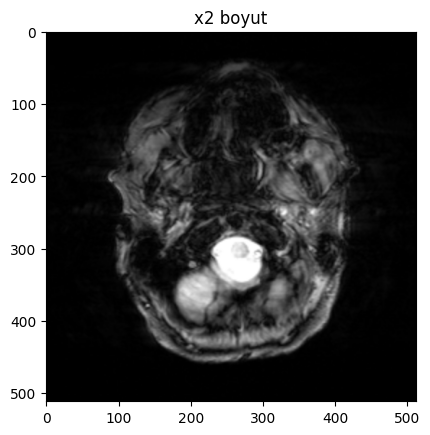

In [ ]:
img = cv.imread('/content/drive/MyDrive/contrast_up.png')
height, width = img.shape[:2]
#Orijinal boyutunu 2 kat büyütüyoruz
sonuc = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_LINEAR)
plt.imshow(img)
plt.title('Orijinal')
plt.show()
plt.imshow(sonuc)
plt.title('x2 boyut')
plt.show()

# Thresholding

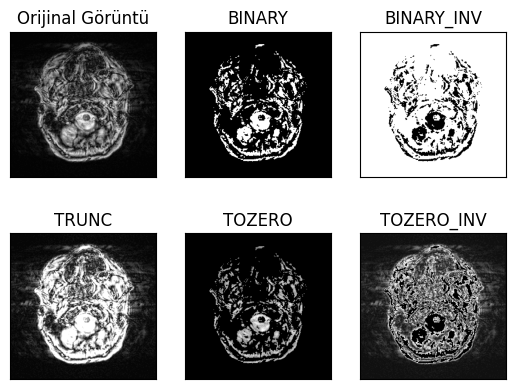

In [ ]:
#Burada resmi çeşitli yöntemlerle binary olarak çeviriyoruz.
img = cv.imread('/content/drive/MyDrive/clahed_img.png',0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Orijinal Görüntü','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Kenar Belirleme - 1

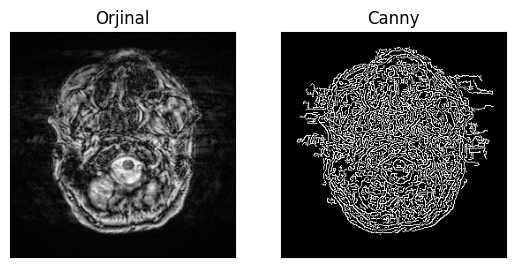

In [ ]:
#canny kullanarak görüntümüzün kenarlarını çıkartıyoruz
img = cv2.imread('/content/drive/MyDrive/clahed_img.png',0)
edges = cv2.Canny(img,50,180)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Orjinal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

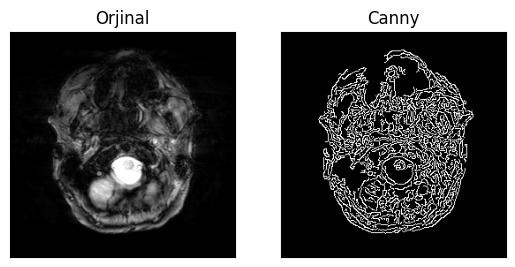

In [ ]:
#bu sefer kontrastı arttırılmış görüntü ile deniyorum
# sonuç daha az karışık gözüküyor, belki daha önemli kısımların vurgulanmasında önemli olabilir
img = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)
edges = cv2.Canny(img,50,180)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Orjinal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

# Kenar Belirleme - 2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/contrast_up.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

In [ ]:
img_canny = cv2.Canny(img,100,200)

In [ ]:
#sobel
#birinci derece türev kullanarak kenar hesaplaması yapar
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

In [ ]:
#prewitt
#Görüntünün değişim hızını baz alarak kenar belirleyen algoritmadır
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

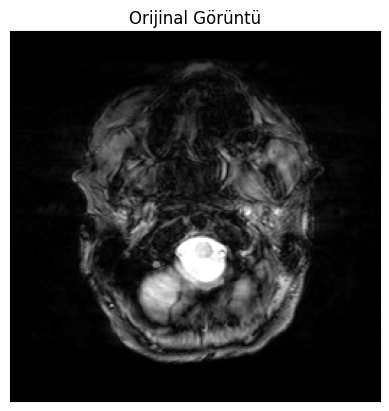

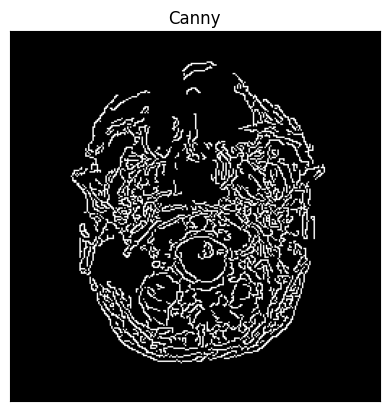

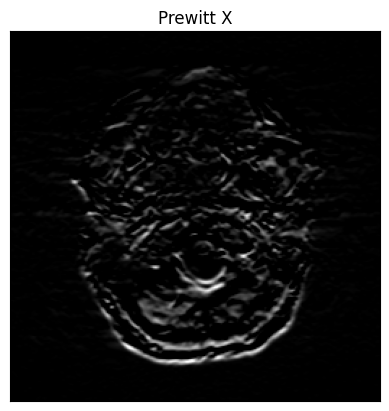

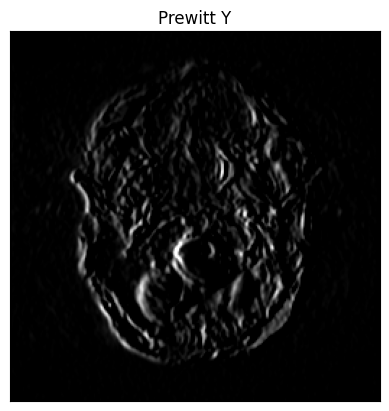

In [ ]:
plt.imshow(img,cmap="gray")
plt.title('Orijinal Görüntü'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow( img_canny,cmap="gray")
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_prewittx,cmap="gray")
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_prewitty,cmap="gray")
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Morfolojik Operasyonlar

(Text(0.5, 1.0, 'Open'), ([], []), ([], []))

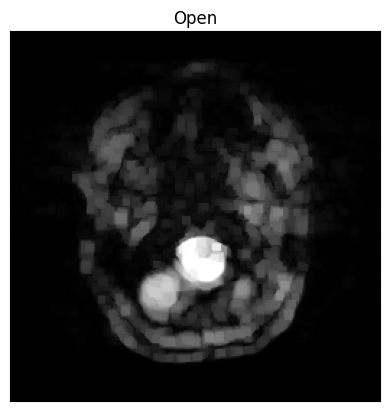

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)
#Numpy ile kernel matris tanımı
kernel = np.ones((5,5),np.uint8)

#Açma
sonuc = cv2.morphologyEx(frame, cv2.MORPH_OPEN, kernel)
plt.imshow(sonuc,cmap="gray")
plt.title('Open'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Erode'), ([], []), ([], []))

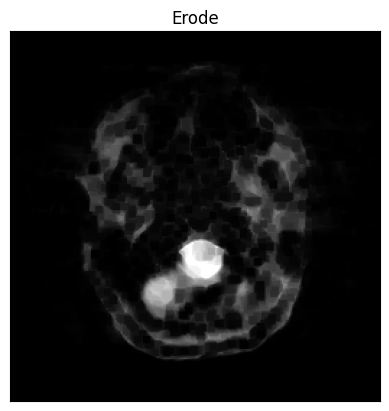

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)
#Numpy ile kernel matris tanımı
kernel = np.ones((5,5),np.uint8)
#Aşındırma işlemi
sonuc = cv2.erode(frame,kernel,iterations = 1)
plt.imshow(sonuc,cmap="gray")
plt.title('Erode'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Dilate'), ([], []), ([], []))

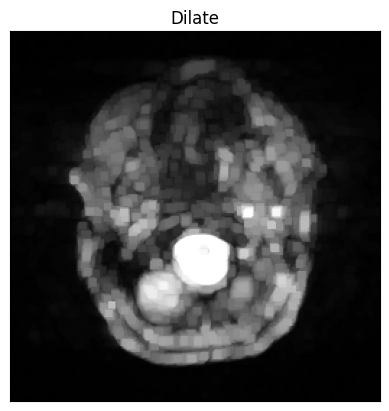

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)
#Numpy ile kernel matris tanımı
kernel = np.ones((5,5),np.uint8)
#genişletme
sonuc = cv2.dilate(frame,kernel,iterations = 1)
plt.imshow(sonuc,cmap="gray")
plt.title('Dilate'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Gradient'), ([], []), ([], []))

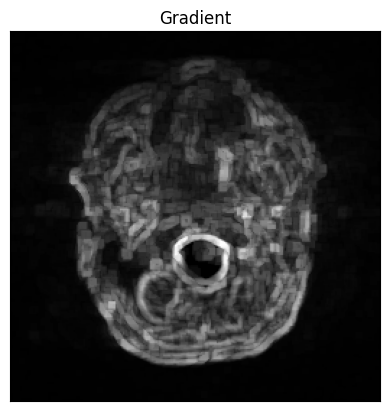

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)
#Numpy ile kernel matris tanımı
kernel = np.ones((5,5),np.uint8) # 5*5  10 ms  25*25 2 ms

#Gradyan
sonuc = cv2.morphologyEx(frame, cv2.MORPH_GRADIENT, kernel)
plt.imshow(sonuc,cmap="gray")
plt.title('Gradient'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Kapama'), ([], []), ([], []))

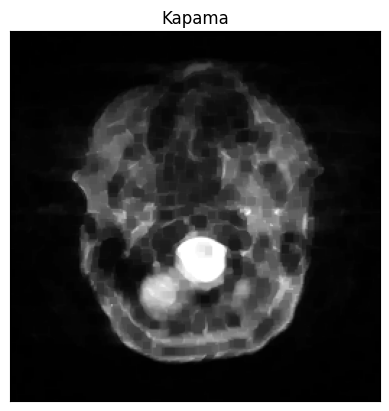

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/contrast_up.png',0)
#Numpy ile kernel matris tanımı
kernel = np.ones((5,5),np.uint8)

#Kapama
sonuc = cv2.morphologyEx(frame, cv2.MORPH_CLOSE, kernel)
plt.imshow(sonuc,cmap="gray")
plt.title('Kapama'), plt.xticks([]), plt.yticks([])

Morfolojik işlemlerde kernel küçültülüp denemeler yapılarak daha farklı sonuçlar elde edilebilir.